In [320]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [340]:
from wavelets import *
from draws import *
from chaos_searh import *
from BP_dynamics import *
import pywt
plt.rcParams.update({'font.size': 25})

## Определение параметров системы:

In [322]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

# Решение системы ФХН при фиксированном параметре $Bbp = 0.1$ и изменении $Bpb = 0.15-0.25$

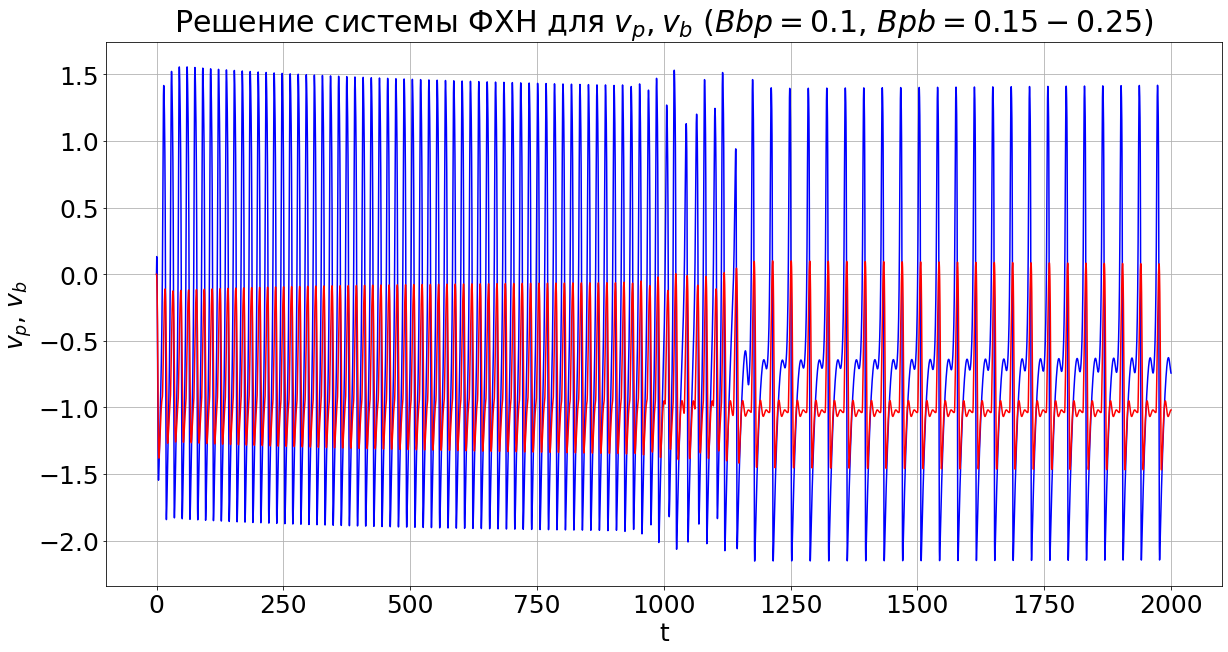

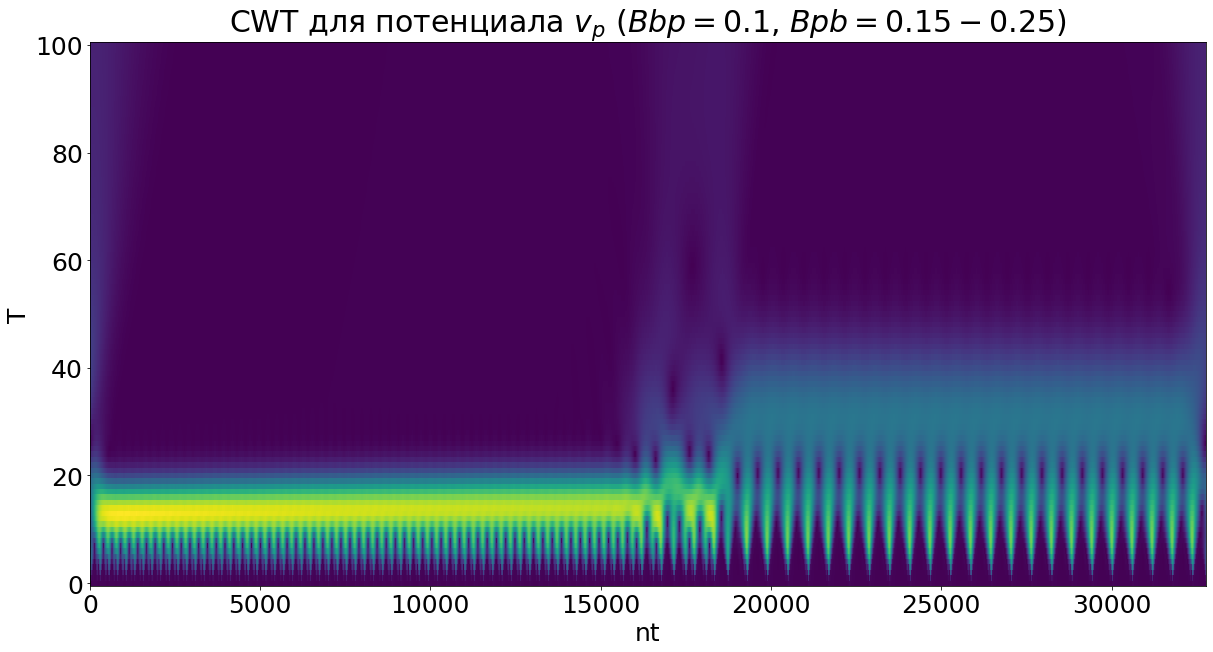

In [344]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

# phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

# В начале система ведет себя как мягкий релаксатор по параметру потенциала пирамидальной клетки $v_p$ при $B_{bp} = 0.1$ и $B_{pb}= 0.15-0.18$. Ниже приведены графики для данного режима T ~ 15

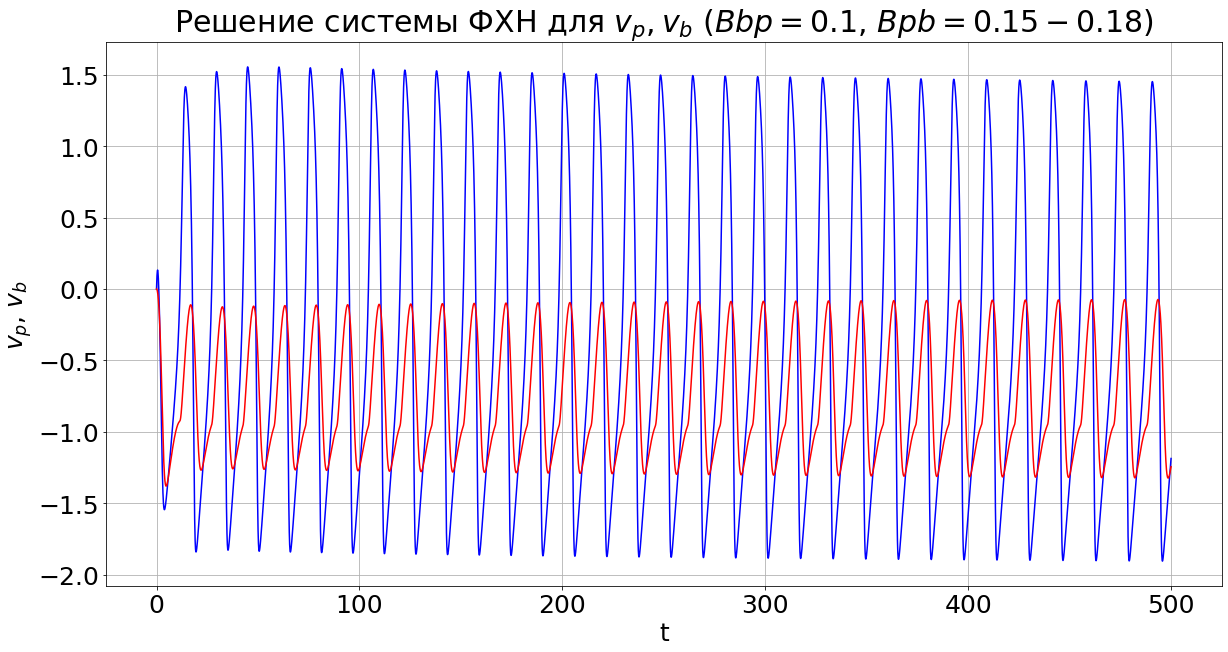

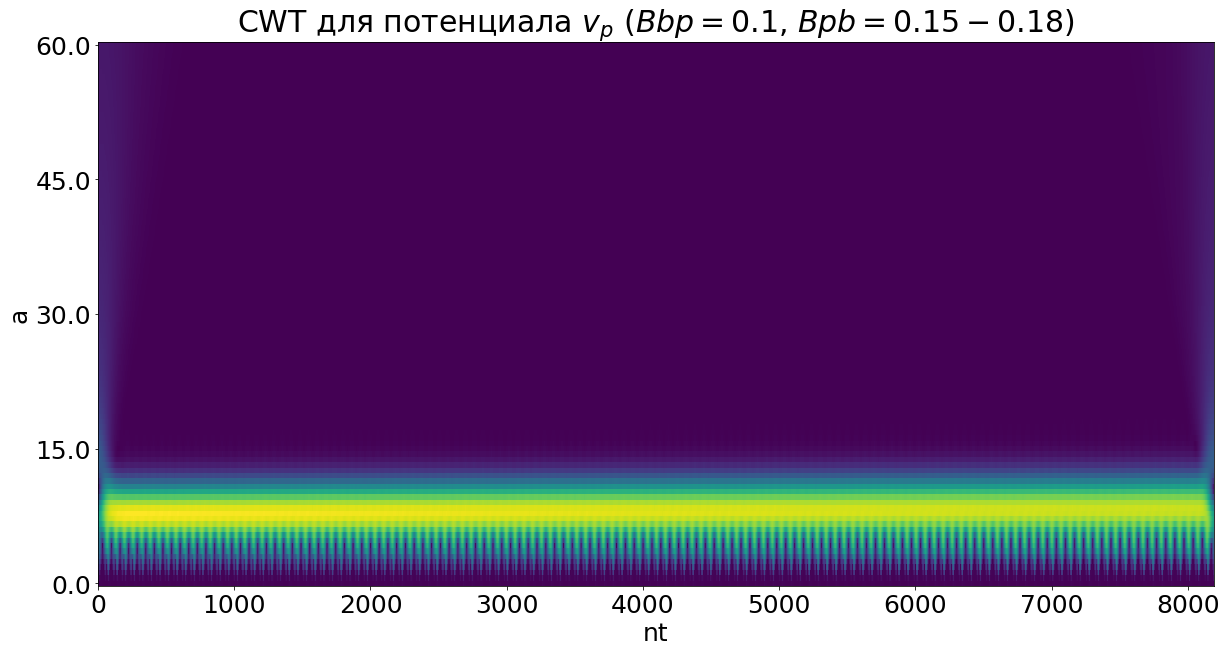

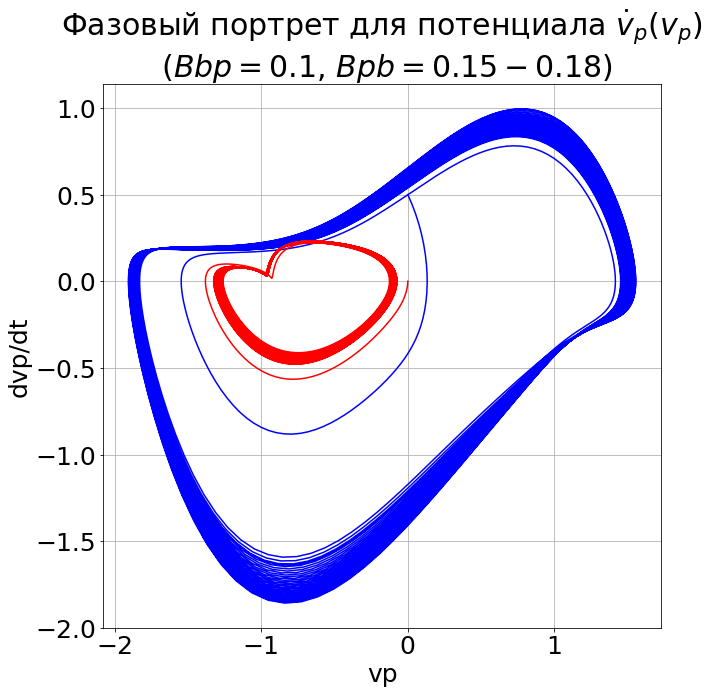

In [393]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.18 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=500, nt=2**13)

wavelet_draw(args2, scale, ts=2000, nt=2**13)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=500, nt=2**13)

## Далее следует исследование области при $B_{bp} = 0.1$ и $B_{pb} = 0.20-0.201$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)

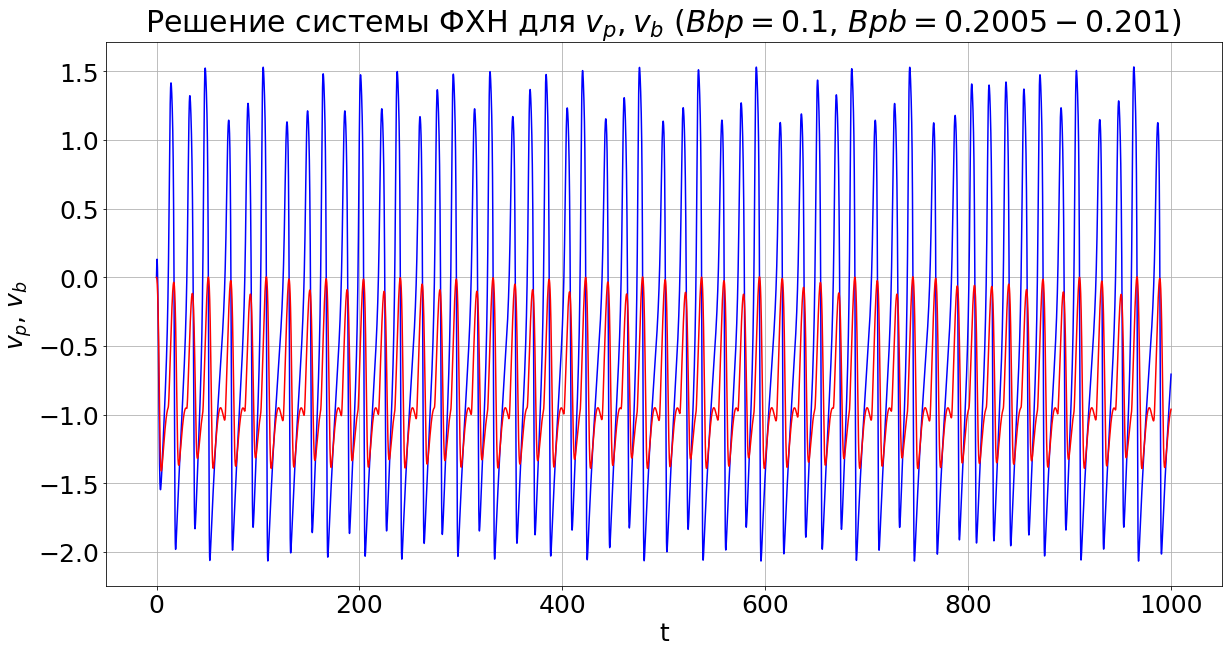

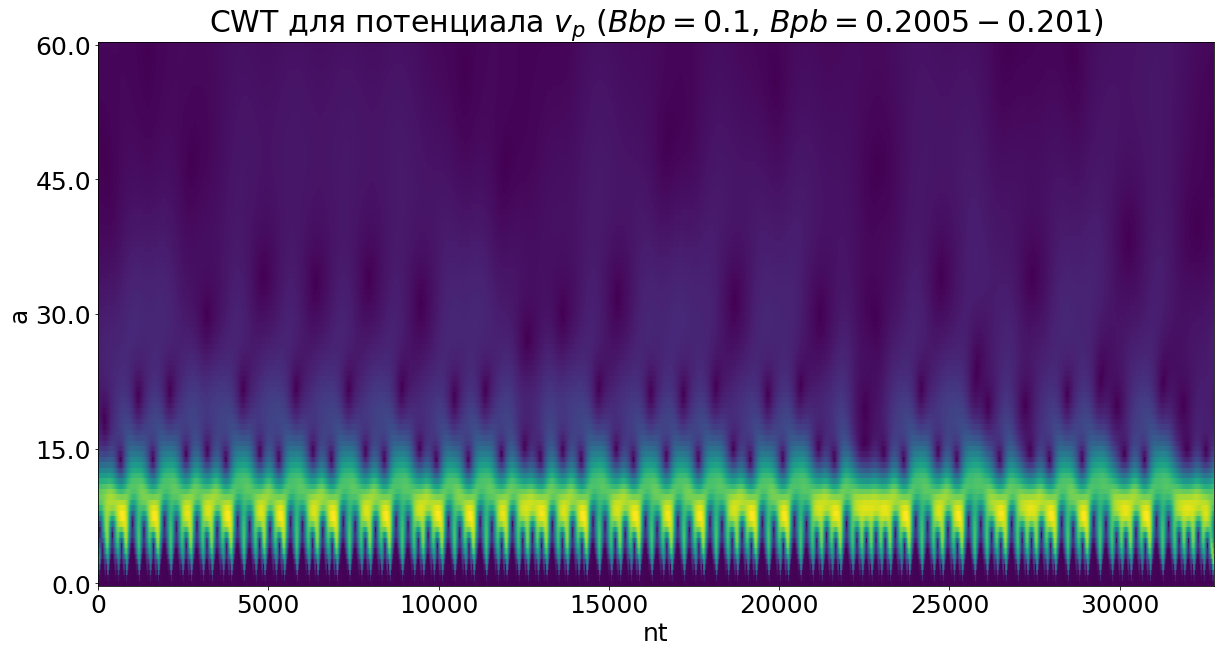

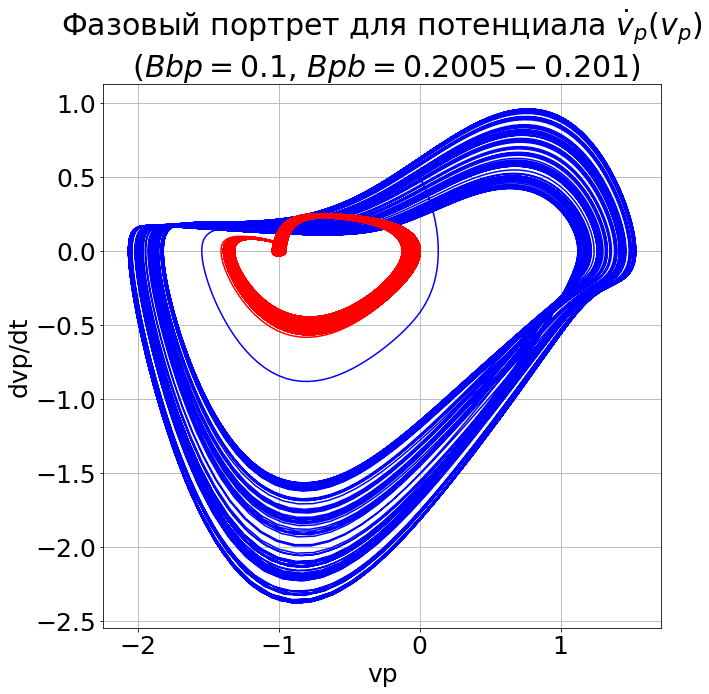

In [394]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.2005 # синаптический параметр
Bpbmax = 0.201 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=1000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

### В целом, будто видно устойчивость по Пуассону, но есть ли для данных значений параметров хаос? Попробуем построить приближенную оценку показателя Ляпунова при малом изменении начальных условий (может быть для строгости стоит применить алгоритм Беннетина). 

## Показатель Ляпунова положителен, поэтому скорее всего мы действительно наблюдаем хаос

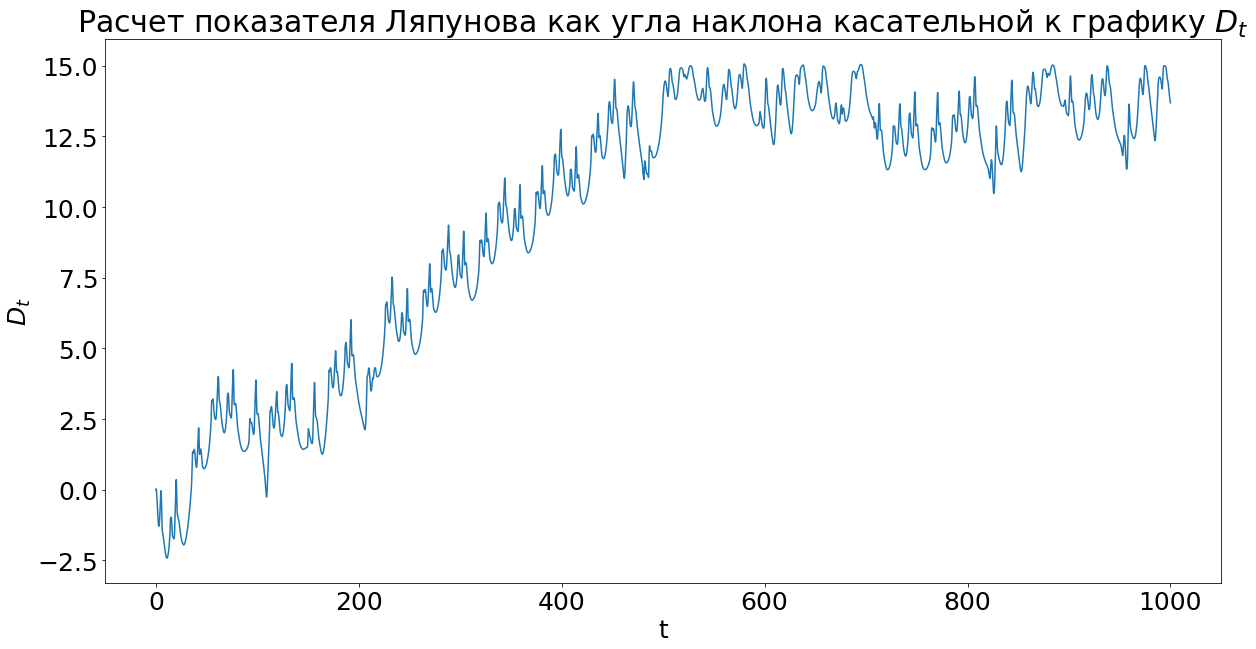

In [386]:
Bbp = 0.1 # синаптический параметр
Bpb = 0.2005
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

sol, t = calcODE(args, 0, 0, 0, 0, 0, 0, ts=2000, nt=2**15)

sol1, t = calcODE(args, *sol[-1], ts=1000, nt=2**15)
sol2, t = calcODE(args, *(sol[-1] - [0.000001, 0, 0, 0, 0, 0]), ts=1000, nt=2**15)

plt.figure(figsize=(20, 10))
plt.plot(t, np.log(np.linalg.norm(sol1 - sol2, axis=1) / np.linalg.norm(sol1[0] - sol2[0])))
plt.title("Расчет показателя Ляпунова как угла наклона касательной к графику $D_t$")
plt.xlabel("t")
plt.ylabel("$D_t$")
plt.show()
# plt.plot(t, np.log(np.abs(sol1[:, 0] - sol2[:, 0]) / np.linalg.norm(sol1[0] - sol2[0])))
# plt.show()


## Построим гистограмму по средним периодам колебаний, чтобы посмотреть, какие предельные циклы существуют при параметрах  $Bbp = 0.1$ и $Bpb = 0.15-0.25$

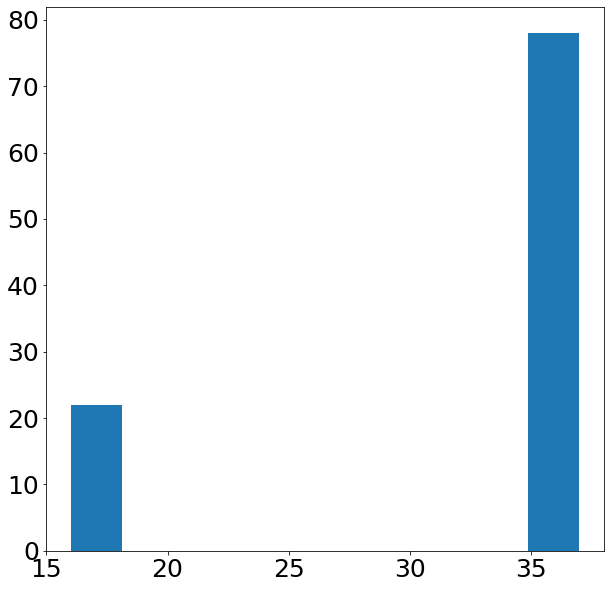

In [389]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.18 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

## Ниже такая же диаграмма, но в области предпологаемого хаоса

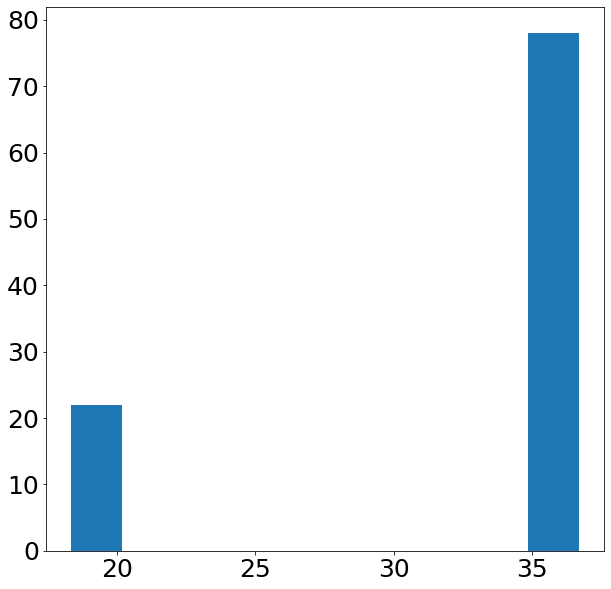

In [390]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.2005 # синаптический параметр
Bpbmax = 0.201 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

## Такая же гистограмма, но для области после перехода из одного режима с другой посредством хаоса

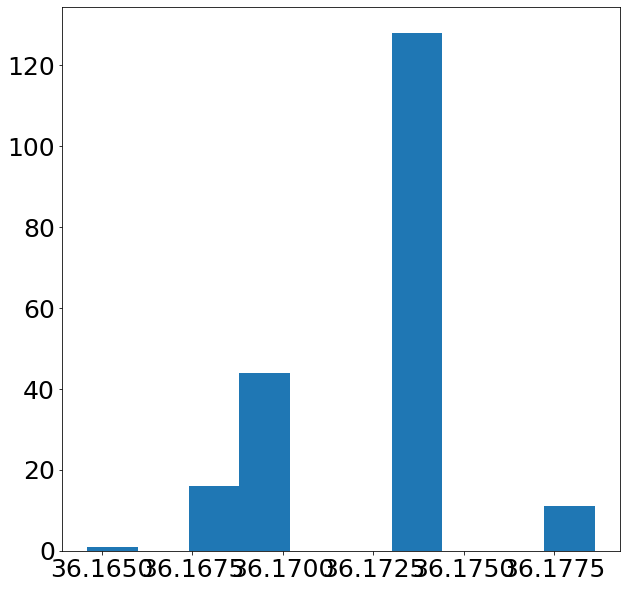

In [392]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.21 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 200)

## Ниже на графиках строим решение системы ФХН при фиксированном параметре $Bbp = 0.1$ и изменении $Bpb = 0.15-0.25$ для различных начальных значений потенциала $v_p$: 
### первый график при $v_{p0} = -2$, 
### второй график при $v_{p0} = -0.7$, 
### третий график при $v_{p0} = 0.7$, 
### четвертый график при $v_{p0} = 2$.

## Можно сделать вывод, что при отрицательных $v_{p0}$ не возникает перехода от одного режима к другому.

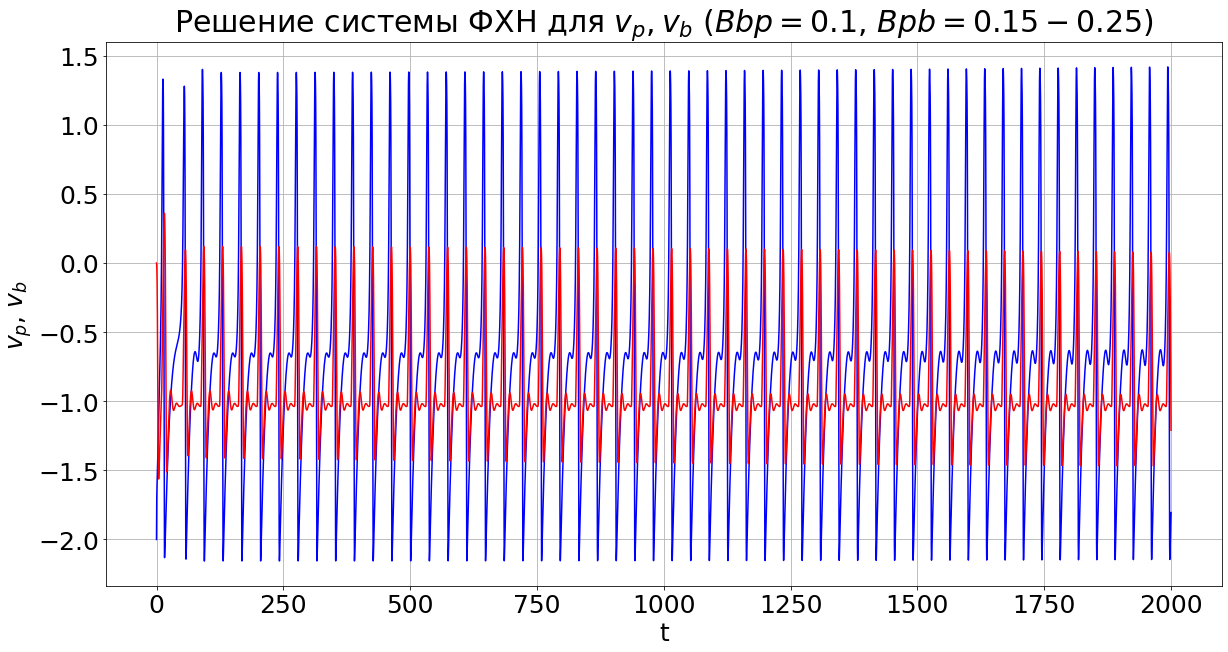

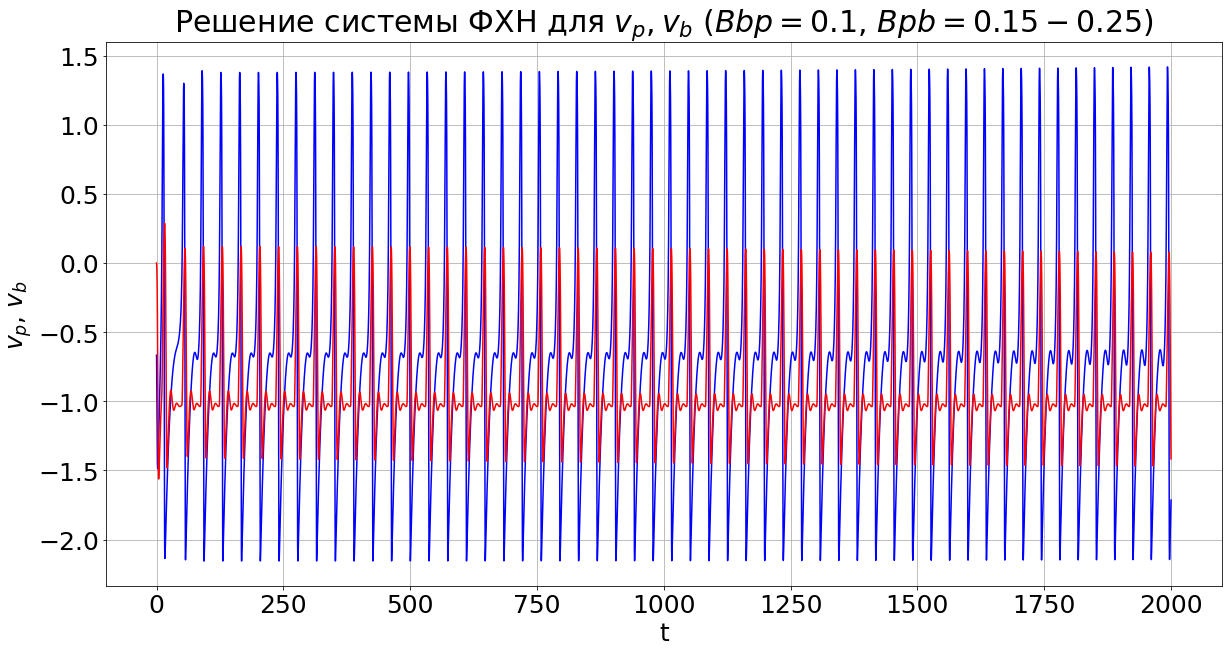

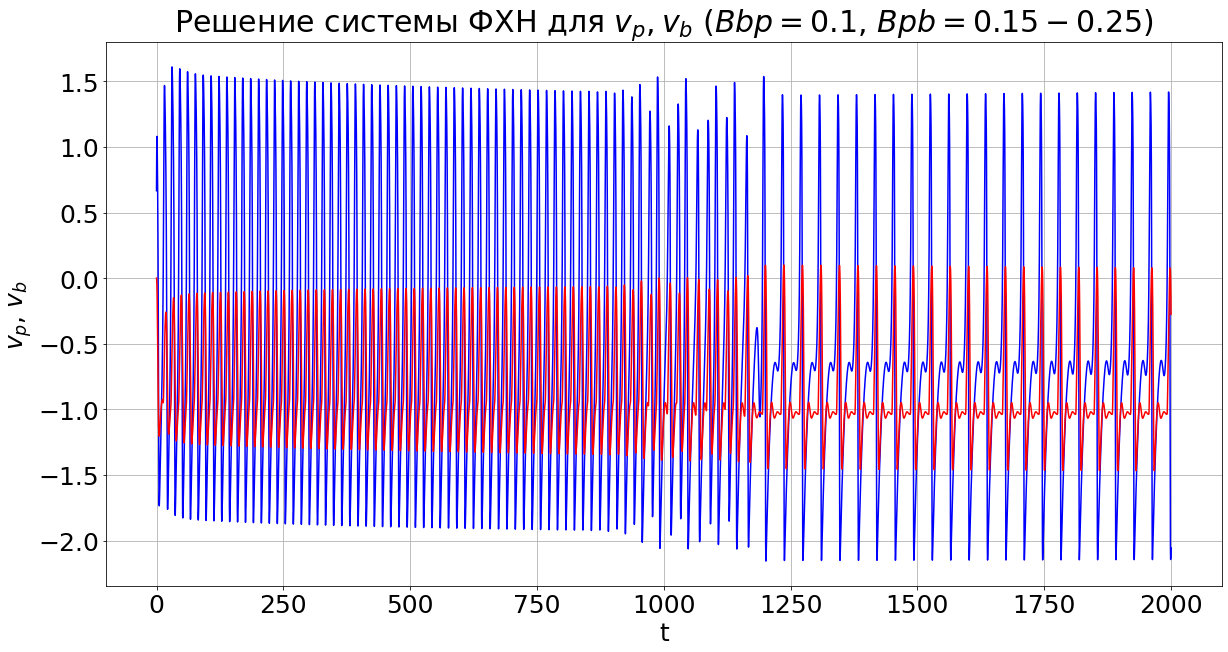

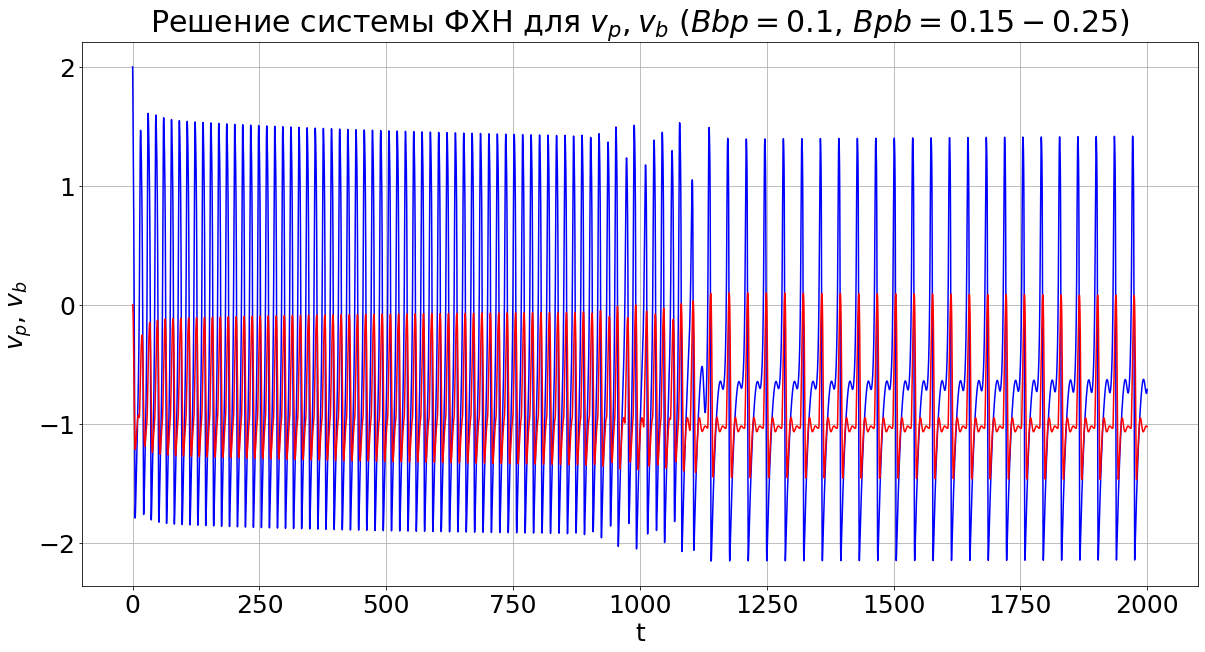

In [154]:
Bbp = 0.1 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

vp0s = np.linspace(-2, 2, 4)
for vp0 in vp0s:
    signal_draw2(args2, vp0, ts=2000, nt=2**15)
#     wavelet_draw(args2, scale, vp0=vp0, ts=2000, nt=2**15)
#     phase_portrait(args2, vp0=vp0, ts=2000, nt=2**15)